
## Regression in Python: Exploratory Data Analysis for Linear Relationships
# Predicting Prices of Boston Housing Values

***
**This is an exploratory Data Analysis utlizing some basic statistical concepts:** 

* Linear Regression Models
* Prediction using Linear Regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. 

This project is adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. 

***

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 

***

The packages used in this project are: 

`matplotlib`,  `pandas`,  `numpy`, `statsmodels` and `seaborn`

In [16]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
## Load and Asess the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module.

In [17]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [18]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [19]:
boston.data.shape

(506, 13)

In [20]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### Describing the Data Set

In [21]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

***
## Setting up our Housing Data for Linear Regression Analysis
***
#### Create a DataFrame `bos` containing all the data to use in predicting Boston Housing prices.  

In [61]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Create a variable called `PRICE` which will contain the prices. 
#### This information is contained in the `target` data, what we want to predict using the linear model.

In [63]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***
## Summary Statistics
***

#### Exploring this data set.  First, use `describe()` to get basic summary statistics for each of the columns. 

In [24]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Analysis:
We have data from 506 neighborhoods/townships in the Boston area. Here's a look into the central tendencies and distribution of some key features:
- The average per capita crime rate is 3.59 
- The average number of rooms per dweling is 6.28, but ranges from 3.5 to 8.
- The average nitic oxide concentration (in parts per 10 million) is .55. The neighborhood with the least NOX has .38, the one with the most has .87. 
- The average Pupil-Teacher ratio is 18 students to one teacher. 
- The average weighted distance to the five major Boston employment centers is 3.79.
- The average percent of lower status population is 12.65%, but ranges from 7.14% to a more impovrished 37.97%

***
# Building the Regression Model
***

## Step 1: Checking for Linearity - Scatterplots
***

#### Using scatter plots, let's take a look into the relationships between the variables and price.  In order to create a linear model, the predictors or features that we use must have a linear relationship to price. 

### Strong Possible Predictors:
These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

#### Number of Rooms
Strong positive coorelation, as the number of rooms increase/decrease, the housing price increases/decreases

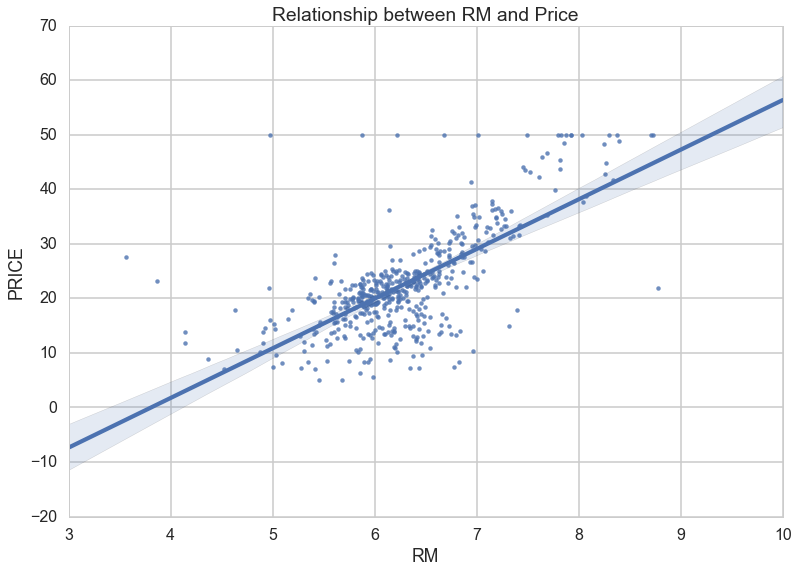

In [47]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)
plt.title("Relationship between RM and Price")

#### % of Lower Status Population 
Strong negative coorelation, the more/less the population consists of lower status individuals,housing price decreases/increases.

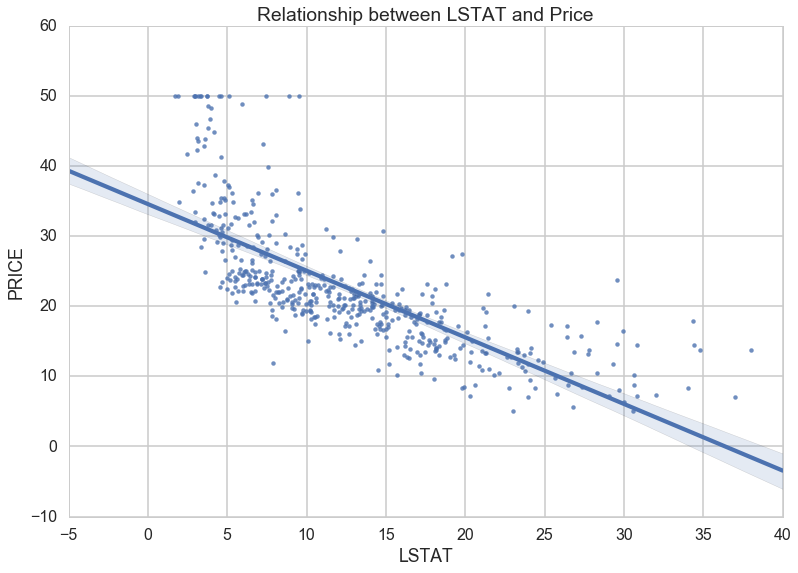

In [46]:
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True)
plt.title("Relationship between LSTAT and Price")

#### Nitrus Oxide Concentration (in parts per 10 million)
Strong negative coorelation, the more/less concentrated NOX is in the air, the lower/higher the price of housing.

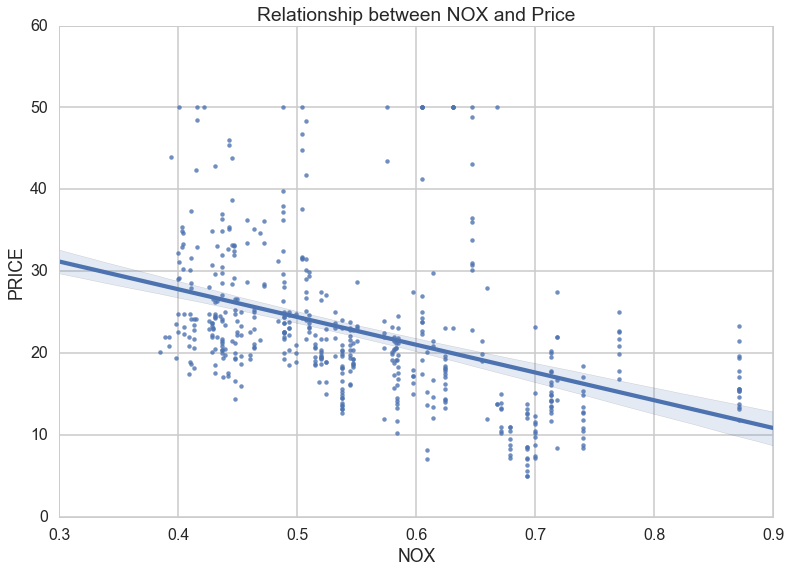

In [45]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True)
plt.title("Relationship between NOX and Price")

#### Weighted Distance from 5 Major Employment Centers
Strong positive coorelation, the closer/further the town is from employment centers, the higher/lower the housing price.

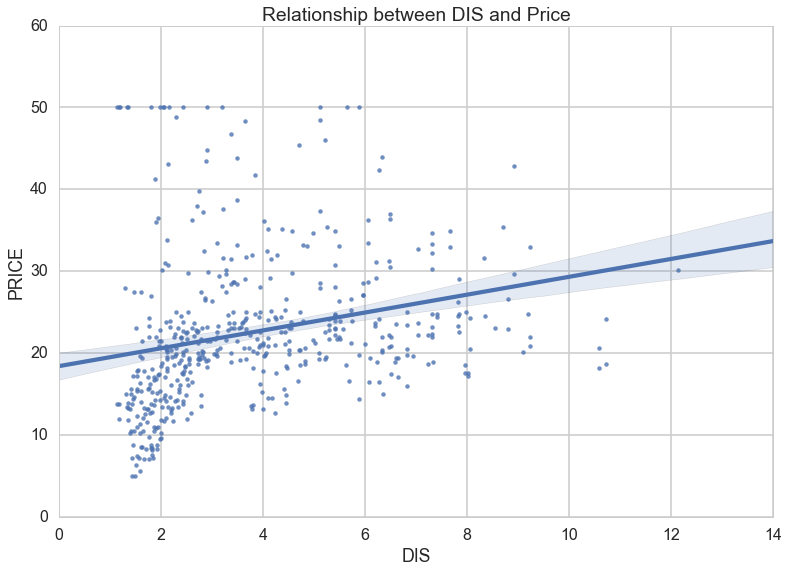

In [44]:
sns.regplot(y="PRICE", x="DIS", data=bos, fit_reg = True)
plt.title("Relationship between DIS and Price")

### Weaker (still decent) Possible Predictors:
These features have string relationships to price exemplified by a small, tight distribution of data around the line of best fit extimated by the plot.

#### Pupil Teacher Ratio
As the number of students increases for every teacher, the value of housing decreases.

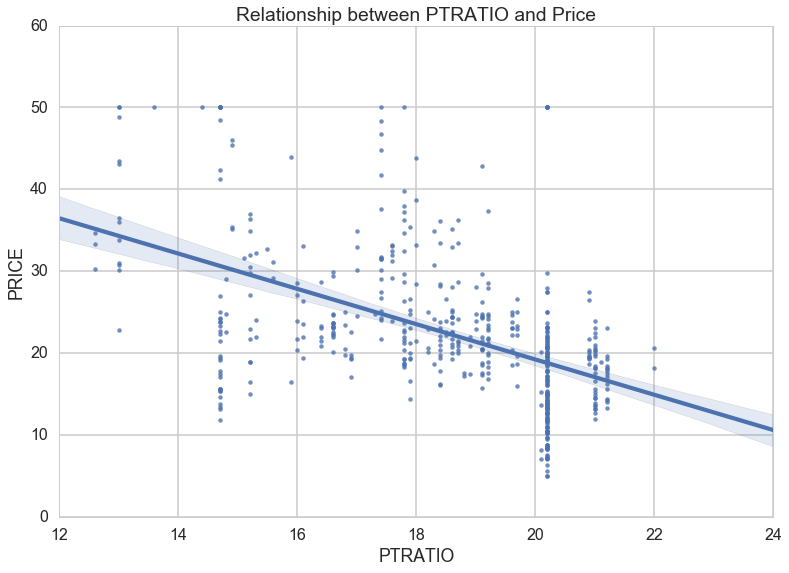

In [43]:
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True)
plt.title("Relationship between PTRATIO and Price")

#### Crime Rate
As them crime rate decreases/increases, the housing price increases/decreases.

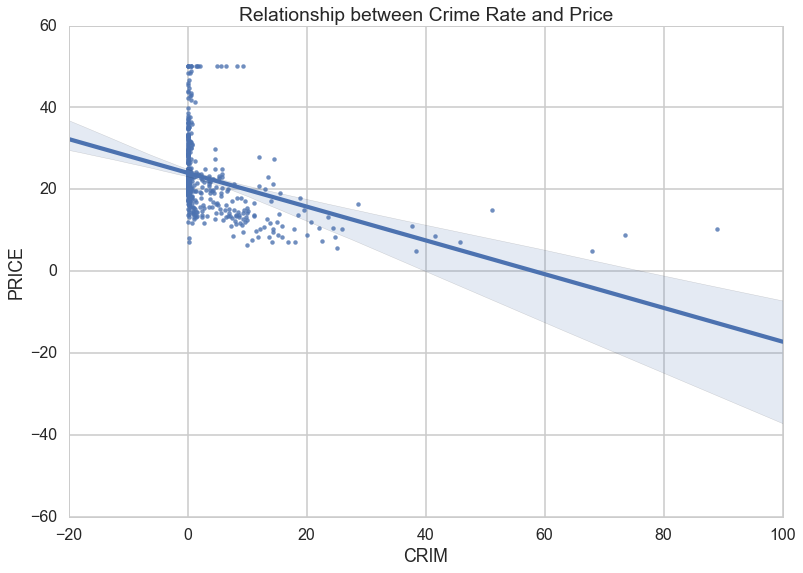

In [42]:
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True)
plt.title("Relationship between Crime Rate and Price")

***
## Step 2: Checking for Normality: Histograms
***
#### Now we have some possible variables that we can use to predict price. The next assumption we must check is that the values are normally distributed, if they are not we will transform the data so that it is. 

Taking the log of the data helps to normalize the data and eliminate any skew in the distribution to make patterns more visible and data more interprettable. 

#### Adjusting the Crime Rate Feature

When we look at our Crime Rate and Price graph, we see it exhibits exponential decay. This can be coorected by taking it's log so that it has a linear relationship with price. 

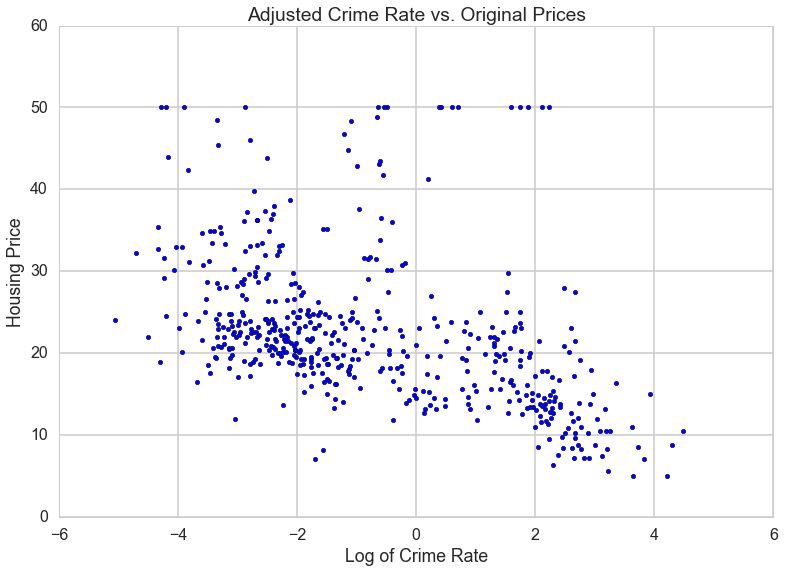

In [53]:
x = np.log(bos.CRIM)
plt.scatter(x, bos.PRICE)

plt.xlabel("Log of Crime Rate")
plt.ylabel("Housing Price")
plt.title("Adjusted Crime Rate vs. Original Prices")

#### Crime Rate now has a normal distribution:

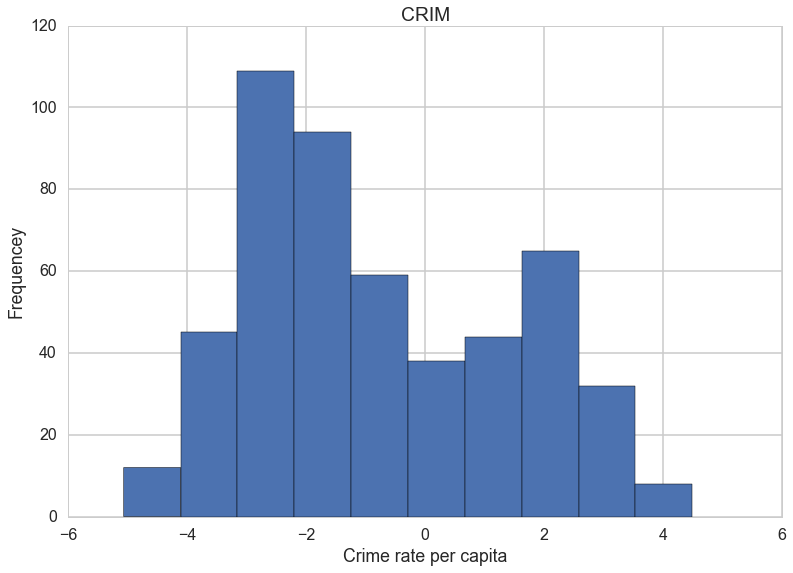

In [32]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

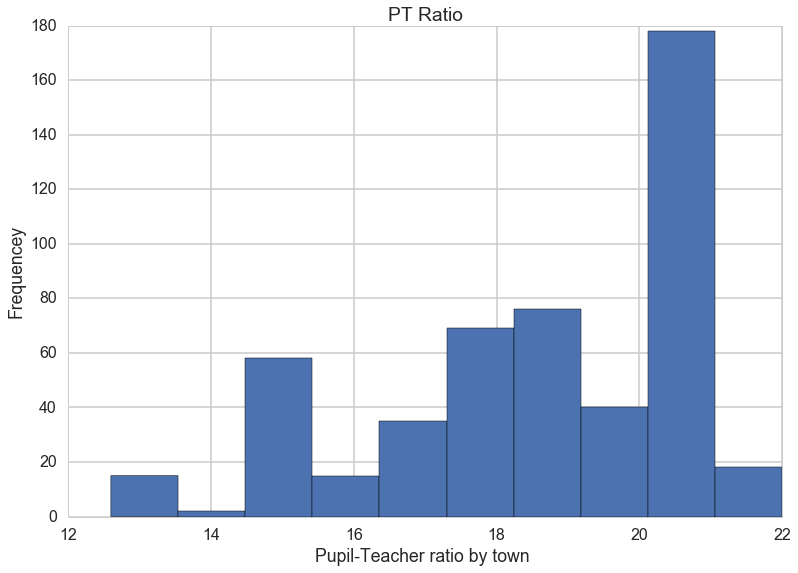

In [34]:
plt.hist(bos.PTRATIO)
plt.title("PT Ratio")
plt.xlabel("Pupil-Teacher ratio by town ")
plt.ylabel("Frequencey")
plt.show()

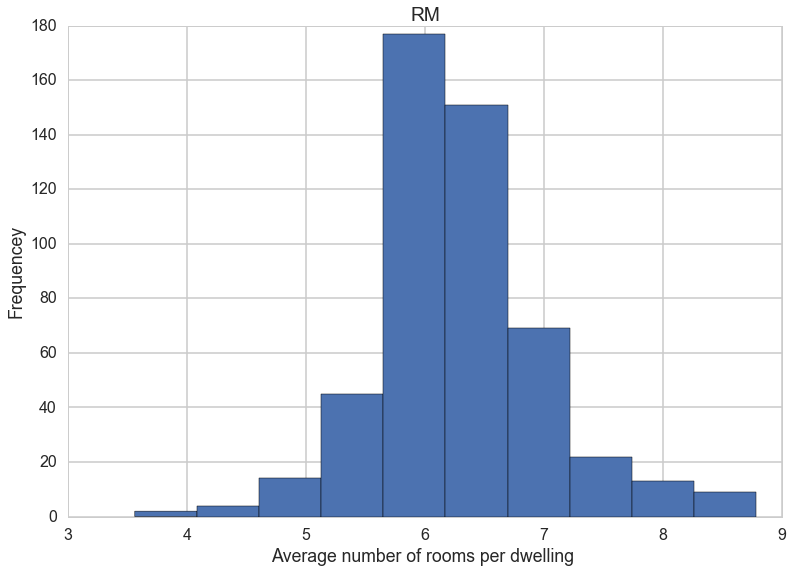

In [35]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average number of rooms per dwelling ")
plt.ylabel("Frequencey")
plt.show()

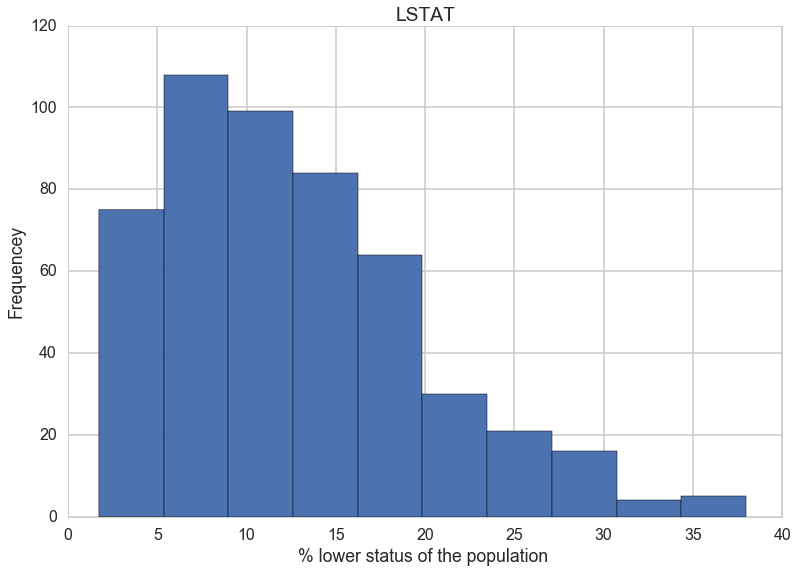

In [36]:
plt.hist(bos.LSTAT)
plt.title("LSTAT")
plt.xlabel("% lower status of the population ")
plt.ylabel("Frequencey")
plt.show()

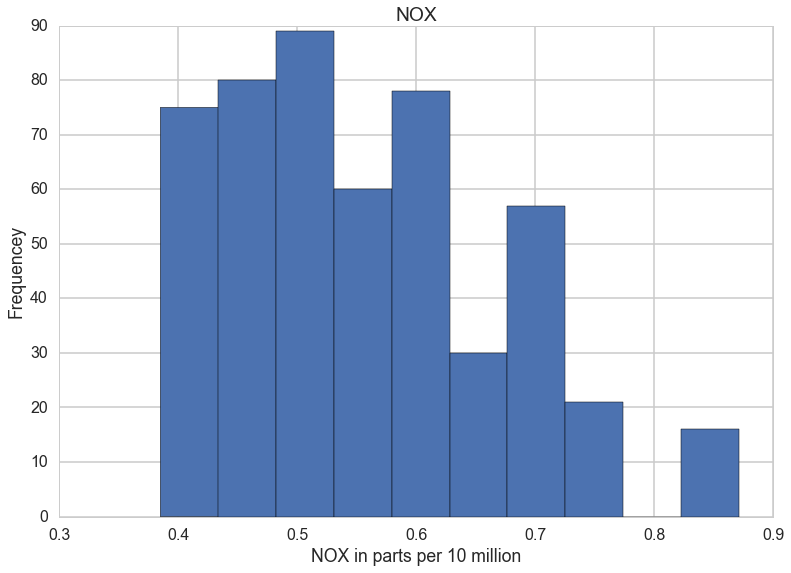

In [82]:
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("NOX in parts per 10 million")
plt.ylabel("Frequencey")
plt.show()

### Lets update the dataframe with our findings from normalization:

In [ ]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

***
## Part 3: Checking for coorelation between our Features- Coorelation Matrix
***

In [72]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])
df = bos1.iloc[:, [0,4,5,7,10,12]]
df.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT
CRIM,1.000000,-0.075324,-0.222442,-0.294039,NaN,-0.067909
NOX,-0.075324,1.000000,-0.302188,-0.769230,0.188933,0.590879
RM,-0.222442,-0.302188,1.000000,0.205246,-0.355501,-0.613808
DIS,-0.294039,-0.769230,0.205246,1.000000,-0.232471,-0.496996
PTRATIO,NaN,0.188933,-0.355501,-0.232471,1.000000,0.374044
LSTAT,-0.067909,0.590879,-0.613808,-0.496996,0.374044,1.000000


#### We drop CRIM due to high coolinearity.

***
## Part 4: Linear Regression with Boston Housing Data Example
***
$Y$ = boston housing prices 

and

$X$ = all the other features (or independent variables, predictors)

which will be use to fit a linear regression model and predict Boston housing prices. Will use the least-squares method to estimate the coefficients.  

### Fitting Linear Regression using `statsmodels`
***


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
bos1 = bos
bos1['CRIM'] = np.log(bos1['CRIM'])

In [77]:
m = ols('PRICE ~ PTRATIO + NOX + RM + LSTAT + DIS ',bos1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Thu, 22 Dec 2016   Prob (F-statistic):          3.67e-131
Time:                        19:16:34   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

### Interpreting coefficients

There is a ton of information in this output.We concentrate on the coefficient table (middle table).
- We begin interpretting the  coefficients by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that our selected features are a statistically significant predictor of `PRICE`.


**In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."**

**On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0. Our $\hat{\beta}_0$ is $\$23,000$.**


**Lets look at our three most significant regression coefficients:** 

- The **LARGEST** regression coefficient is for `RM` of 4.2933 means that *on average, each additional room is associated with an increase of $\$4,300$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$3,400, \$5,128$). That's a lot of money for each additional room!


-  Another significant feature, indicated by a high regression coefficient, is `PTRATIO`'s of  -.9256. This means that *on average, each point increase in PTRATIO is associated with an decrease of $\$925$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$692, \$1,159$).


- Our third most significant feature, is `DIS`'s of  -.6926. This means that *on average, each increase in DIS is associated with an decrease of $\$692$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$398, \$998$).






### Intrepretting R-squared

This coefficient of determination or r-squared,  tells us that 70% percentage of the total variance in the price can be explained by the linear regression model. This is an important statistics that measures how 'good' our model is a t predicitng price.

This percentage tells us how much of variance in y can be explained by the model we have created, the higher the percent the more the model fits your data. 

**At 70%, almost 3/4ths of the variability can be attributed to our model, which is high. We have a well fit model!**


***
## We now have a linear regression equation which takes the inputs of: 

### - # Rooms, Crime Rate, PT Ratio, % Population Lower Status & Distance from Employment Centers 

## and estimates the price of a house in the Boston area with a high statistical significance indicated by the low f-stat. 
***

### Evaluating the Fit of our Model
***

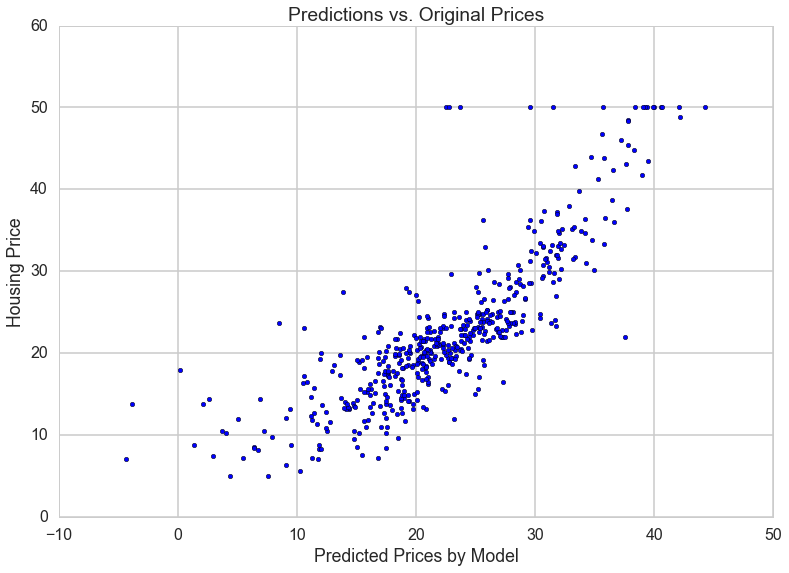

In [41]:
predicted_prices = m.fittedvalues

plt.scatter(predicted_prices, bos.PRICE)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

We create a scatterplot between the predicted prices, available in m.fittedvalues (where m is the fitted model) and the original prices. We evaluate this plot to see how well our regression model predicts price of given the data in our bos data set.

A perfect model would get us a scatterplot where all the data lies on the 45 degree line. That would mean that x = y, and every predicted price would have equalled the actual price. 

Below the Original Prices of 20, the predictions are very widely distributed along the predicted pricing axis, meaning that as the actual prices decrease, the predictions are not as accurate as they are as the prices increase above this. The model seems to ve underpredicting the price, as the data falls below the 45 degree line.

There are some major outliers, below ~10 and above ~30 on predicted prices.

# Evaluating the Model
We will take a reduced model using only our strongest predictor, # of Rooms, to predict housing price. 
We will evaluate this model using: 
    - Residual Plot
    - QQ Plot
    - Identification/Elimination of Outliers
    - Identification/Elimination of High Leverage Points
    - Create a new model after removing these points 

In [ ]:
### New minimal model: 

In [79]:
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 22 Dec 2016   Prob (F-statistic):           2.49e-74
Time:                        19:20:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

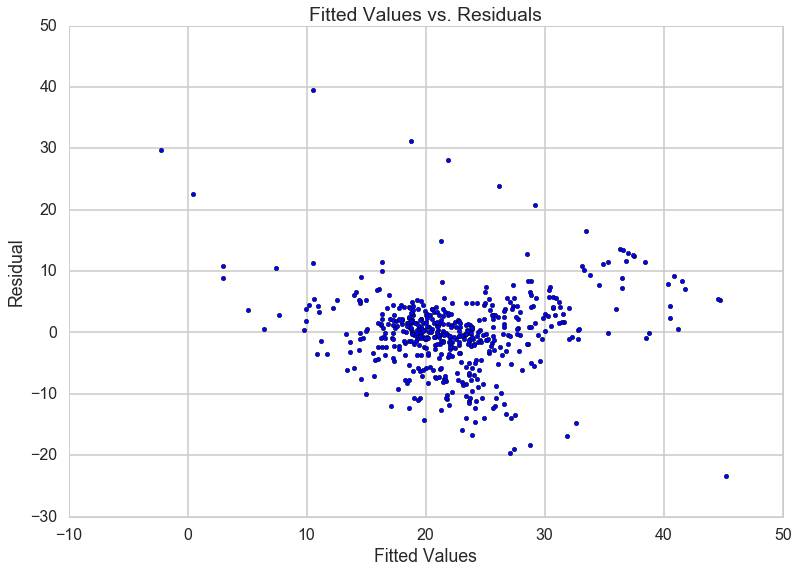

In [181]:
x = m.fittedvalues
y = m.resid
plt.scatter(x, y)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

This plot is testing that the error in the model is normally distributed. 

It does so by ensuring that there is no pattern between the fitted values and the residuals.

There is some negative linear coorelation, but no clear pattern in the plot above, no assumptions have been violated.

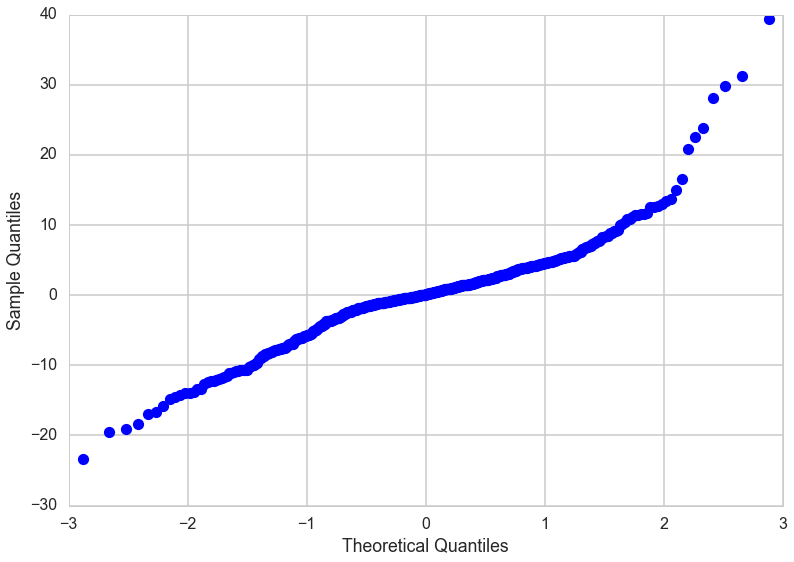

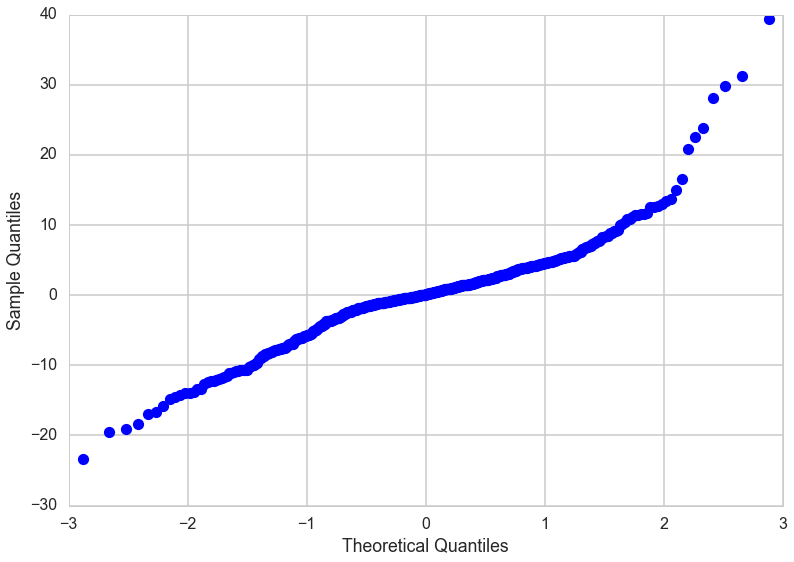

In [182]:
sm.qqplot(m.resid)

Q-Q plots take the sample data, sort it in ascending order, and then plot them versus quantiles calculated from a theoretical distribution. If you were to plot the same distribution against itself, you would ger a straight line in the Q-Q plot. The straighter the line, the more normal the distribution.

Here, we are plotting the residuals against the sample data. The line is reasonably straight but curves up and then down, known as a 'hump'. This suggests that the data may be wide and flat in its distribution.

The Residual Q-Q plot tests for normality of the distribution and does a better job at showing outliers and distribution of the data than a residual plot. It is easier to see patterns in the single line of the Q-Q plot than a scatter plot and there is less room for open interpretation. 

### Identifing Outliers
***Outliers are marked with a red circle:***

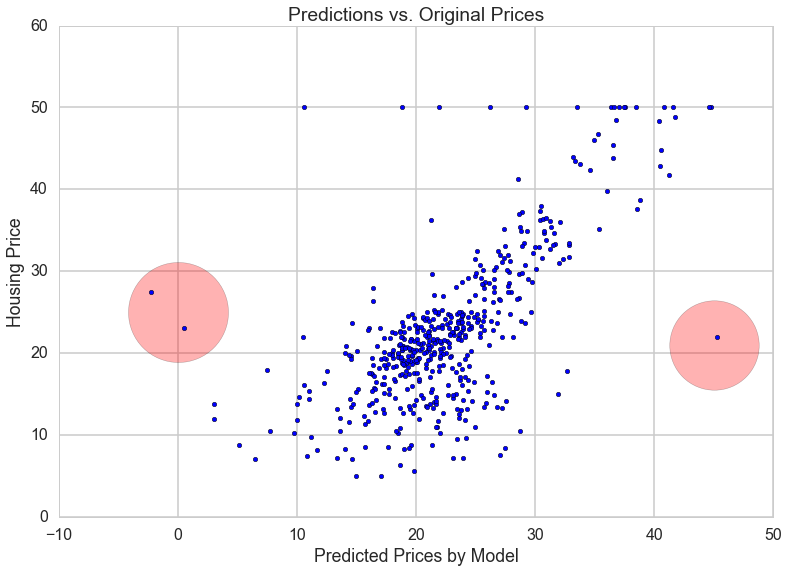

In [183]:
plt.scatter(-0, 25, s=10000, alpha=0.3, c = 'r' )
plt.scatter(45, 21, s=8000, alpha=0.3, c = 'r' )


predicted_prices = m.fittedvalues

plt.scatter(predicted_prices, bos.PRICE)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

Looking at the fitted values vs. prices, there are some outliers for which the model either overpredicted (left red bubble) or underpredicted (righth red bubble). This implies that the data did not fit the model well and were towns that were outliers in the original data. These towns, for whatever reason, have some combination of attributes that are not similar to the other towns. They may have higher tax rates even though there are a large percentage of lower status people, or a low PTRatio when the model predicts they should have a higher one. There are a multidude of real-world answers such as legislation and geography that could contribute to these anomalies. 

### Identifing High Leverage Points: 

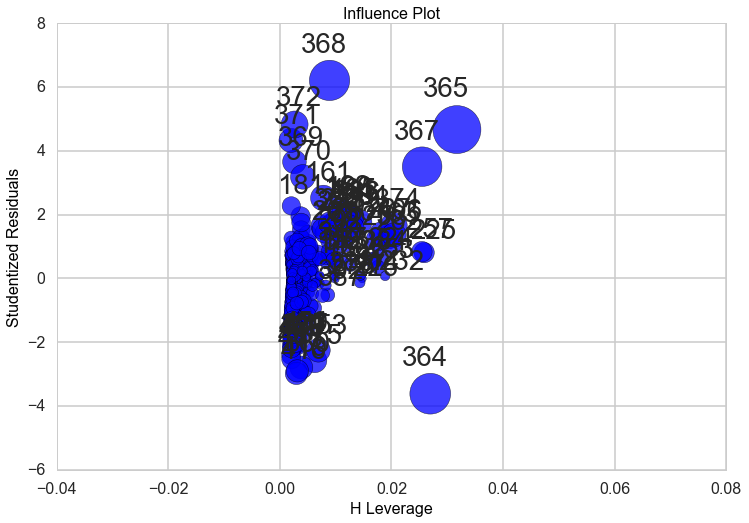

In [184]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(m, ax=ax, criterion="cooks")

A data point has high leverage if it has extreme predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low. With multiple predictors, extreme x values may be particularly high or low for one or more predictors, or may be "unusual" combinations of predictor values. For example, with two predictors that are positively correlated, an unusual combination of predictor values might be a high value of one predictor paired with a low value of the other predictor.

Observations 367, 365, 364 and 368 are high leverage points.

### Removing Outliers

In [80]:
bos['Fitted_Values'] = m.fittedvalues
a
#m = ols('PRICE ~ RM',bos).fit()
#print(m.summary())

In [186]:
# Getting Index for Underpredicted Outliers
bos[bos.Fitted_Values < 5].head(2)
# The points highlighted above graph are at 365, 367

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,-2.258011
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.490826


In [187]:
# Getting Index ofr Overpredicted Outliers
bos[bos.Fitted_Values > 40].tail(1)
# The point highlighted above graph are at 364

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
364,3.47428,0.0,18.1,1.0,0.718,8.78,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,45.245896


In [188]:
#Outliers and Leverage points to be removed:
bos.loc[[364,365, 367, 368]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Fitted_Values
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9,45.245896
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5,-2.258011
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1,0.490826
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0,10.566861


In [195]:
#Model without Outliers
bos1 = bos.drop([364,365, 367, 368])
m_new = ols('PRICE ~ RM',bos1).fit()
print(m_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     646.4
Date:                Fri, 02 Dec 2016   Prob (F-statistic):           3.84e-92
Time:                        09:54:43   Log-Likelihood:                -1614.8
No. Observations:                 502   AIC:                             3234.
Df Residuals:                     500   BIC:                             3242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -41.6074      2.535    -16.415      0.0

In [196]:
#Compare to the model with the outliers
m_old = ols('PRICE ~ RM',bos).fit()
print(m_old.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 02 Dec 2016   Prob (F-statistic):           2.49e-74
Time:                        09:54:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

### By removing these outliers, we have increased the R sqared value from .484 to .564 and decreased the p-value of the f-statistic significantly making the model a much better fit for the data. 